<a href="https://colab.research.google.com/github/martinjamouss/ML-Lab/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 3 , random_state=42).fit(X_scaled)

# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

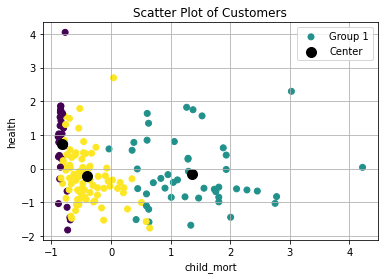

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 2


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [12]:
WCSSs=[]
Ks =range(1,15)
for k in Ks:
  kmeans=KMeans(n_clusters=k, n_init = 30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

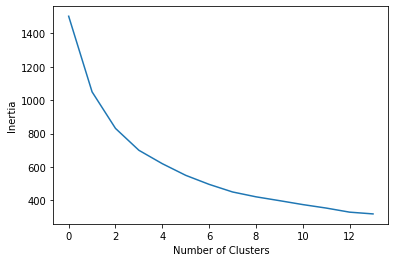

In [13]:
plt.plot(WCSSs)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

I decided to use 3 clusters to group the countries into categories of developed, developing, and underdeveloped, based on their economic and social characteristics.

In [14]:
k = 3
kmeans = KMeans(n_clusters=k).fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [15]:
preds=pd.DataFrame(kmeans.predict(X_scaled))

In [16]:
output = pd.concat([preds,names],axis=1)

In [23]:
print("Cluster 1:")
pd.DataFrame(output[output[0]==0]["country"])

Cluster 1:


,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


In [28]:
print("Cluster 2:")
pd.DataFrame(output[output[0]==1]["country"])

Cluster 2:


,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
...,...
160,Uruguay
161,Uzbekistan
162,Vanuatu
163,Venezuela


In [25]:
print("Cluster 3:")
pd.DataFrame(output[output[0]==2]["country"])

Cluster 3:


,country
7,Australia
8,Austria
11,Bahrain
15,Belgium
23,Brunei
29,Canada
42,Cyprus
43,Czech Republic
44,Denmark
53,Finland


The results are very interesting. It appears that most African countries were clustered into Cluster 1, which suggests they may be underdeveloped. Advanced countries such as Japan, the United States, and Singapore were grouped together in a cluster, indicating they are likely developed countries. Finally, countries such as Armenia and Uruguay were grouped together, suggesting they may be developing countries.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [31]:
Q6DF = pd.concat([preds,X],axis=1)

In [30]:
Q6DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444


# Q7.) Write an observation about the descriptive statistics.

This further supports our intuition. Group 0, which we identified as likely referring to underdeveloped countries, had the highest rates of child mortality, total fertility, inflation, and the lowest life expectancy and income. Group 2, which we identified as likely referring to developed countries, had the lowest rates of child mortality, total fertility, inflation, and the highest life expectancy and income. Group 1, which we identified as likely referring to developing countries, had values in between the other two groups but tended more towards the developed countries in terms of their economic and social indicators.